# Python для анализа данных

## Продолжение Pandas (и немного визуализации)

In [1]:
import pandas as pd # импортировали библиотеку pandas и назвали ее pd 

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Смотреть на числа и таблицы не очень удобно - построим графики!

In [11]:
import matplotlib
%matplotlib inline 

In [5]:
data.Age.median()

28.0

<Axes: >

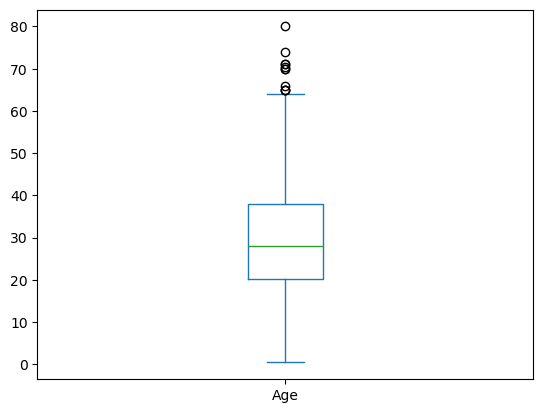

In [7]:
data.Age.plot.box()

<Axes: >

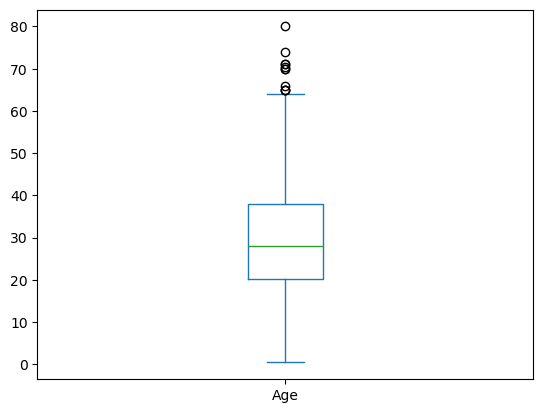

In [9]:
data.Age.plot.box()

## Гистограммы и распределение


**Описательная статистика на Python: количественные и качественные данные**

Описательная статистика или дескриптивная статистика (*англ.* descriptive statistics) занимается обработкой эмпирических данных, их систематизацией, наглядным представлением в форме графиков и таблиц, а также их количественным описанием посредством  статистических показателей.

Для начала разберемся с несколькими важными определениями:

**Распределение**

Случайная величина — это переменная, значения которой представляют собой исходы какого-нибудь случайного феномена или эксперимента. Простыми словами: это численное выражение результата случайного события. Случайная величина является одним из основных понятий теории вероятностей.

Распределение вероятностей — это закон, описывающий область значений случайной величины и вероятности их исхода (появления).

Чтобы чуть лучше понять, что же такое распределение, давайте посмотрим на гистограмму признака "Age".

**Гистограмма**

Гистограмма представляет собой столбчатую диаграмму.

При построении гистограммы множество значений признака разбивается на $k$ интервалов,
эти интервалы становятся основаниями столбцов. Высоты стобцов пропорциональны количеству (частоте) значений признака, попадающих в 
соответствующий интервал.

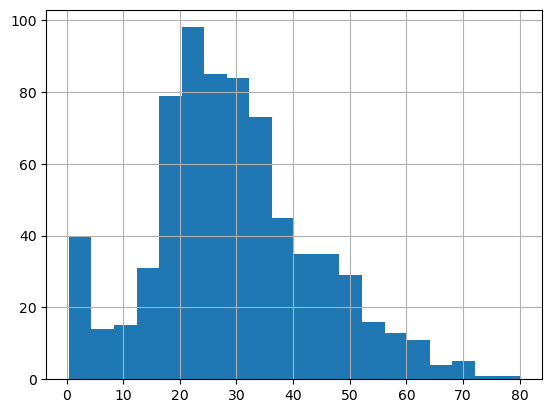

In [19]:
data.Age.hist(bins=20);

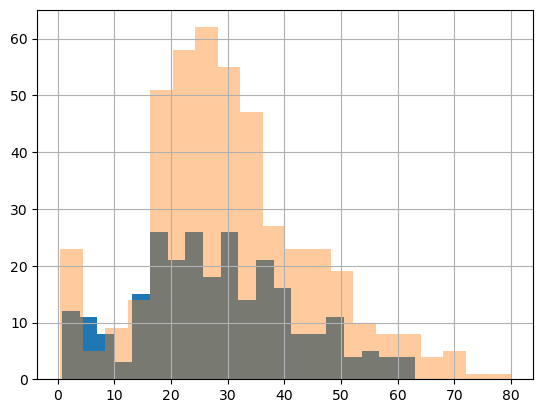

In [23]:
x = data[data.Sex == 'female'].Age.hist(bins=20)
y = data[data.Sex == 'male'].Age.hist(bins=20, alpha=0.4) #гистограмма распределения возраста среди мужчин

Обычно, когда говорят о распределении, представляют сглаженную линию, под которой могли бы находиться все наши данные. Такой график уже показывает нам не сколько раз встречается каждое значение, а какую долю распределения такие значения составляют.
Давайте импортируем библиотеку для визуализаций seaborn (о ней поговорим подробнее чуть позже), которая поможет нам построить такой график.

C:\Users\izeme\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


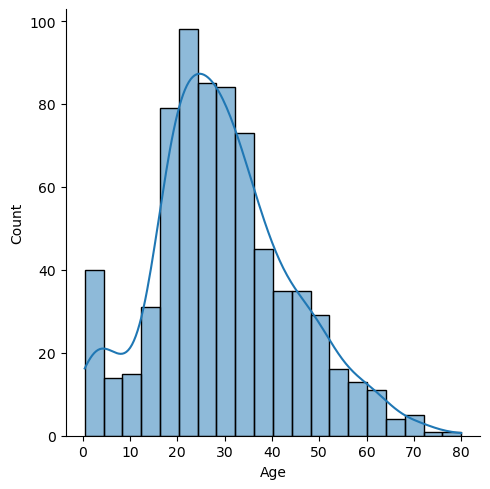

In [27]:
import seaborn as sns  # импортируем библиотеку под именем sns

sns.displot(data.Age, kde=True); 
# применяем функцию, которая строит график распределения из библиотеки seaborn к нашим данным. 
# методом .dropna() опускаем ячейки с пропущенными значениями - иначе seaborn сломается.

[Ядерная оценка плотности KDE](https://ru.wikipedia.org/wiki/%D0%AF%D0%B4%D0%B5%D1%80%D0%BD%D0%B0%D1%8F_%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BF%D0%BB%D0%BE%D1%82%D0%BD%D0%BE%D1%81%D1%82%D0%B8)

В идеальном мире многие вещи распределены нормально (например, вес и рост людей). Это значит, что такое распределение имеет определенные параметры (не будем их обсуждать в этом курсе) и выглядит как колокол (а вот это можно и запомнить). 

Для некоторых моделей в статистике мы можем применять только переменные, которые распределены нормально. Давайте посмотрим, как распределен возраст пассажиров относительно нормального распределения. Для этого импортируем функцию, которая задает нормальное распределение.

C:\Users\izeme\AppData\Local\Temp\ipykernel_8900\10423209.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Age.dropna(), fit=norm);
C:\Users\izeme\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


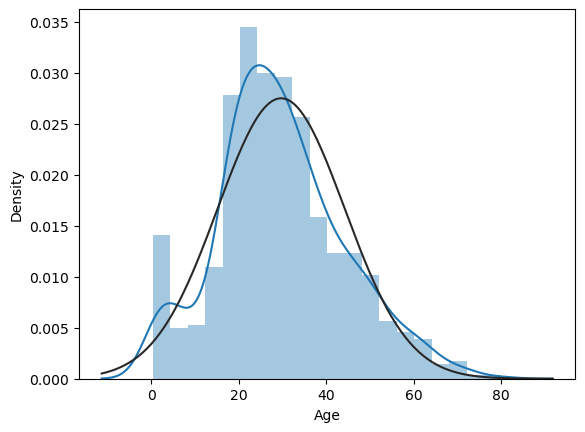

In [28]:
# из пакета для работы со статистическими данными и моделями импортируем команду, которая задает нормальное распределение
from scipy.stats import norm

sns.distplot(data.Age.dropna(), fit=norm);  
# параметр fit строит нам еще один график поверх существующего, 
# сейчас мы просим его построить нормальное распределение 

Как распределние возраста выглядит относительно нормального?


<hr>

## Задание 
Постройте гистограмму для распределения стоимости билетов (Fare)

<Axes: >

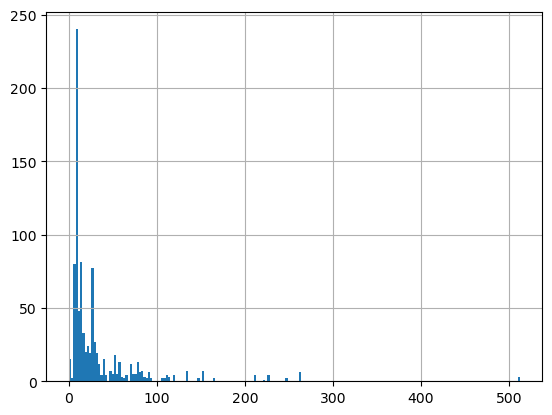

In [32]:
data['Fare'].hist(bins=200)

<Axes: >

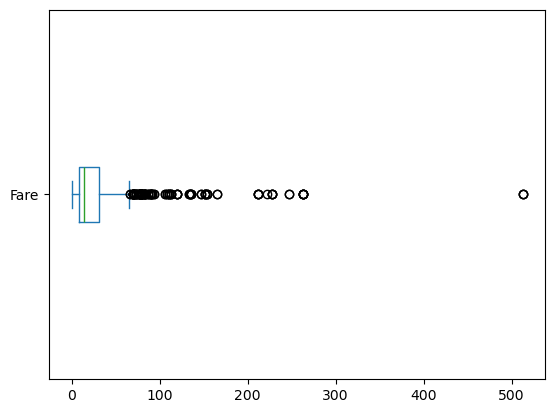

In [34]:
data['Fare'].plot.box(vert=False)

<hr>

Минимальная цена билета?

In [35]:
data['Fare'].min()

0.0

70% квантиль по возрасту?

In [36]:
data['Age'].quantile(.7)

36.0

Немного про [процентили, квартили и квантили](https://www.codecamp.ru/blog/percentile-vs-quartile-vs-quantile/)

**Процентили**: Диапазон от 0 до 100.

**Квартили**: Диапазон от 0 до 4.

**Квантиль**: диапазон от любого значения до любого другого значения.

Обратите внимание, что процентили и квартили — это просто типы квантилей.

**Некоторые типы квантилей даже имеют определенные названия, в том числе:**

* 4-квантили называются квартилями
* 5-квантили называются квинтилями
* 8-квантили называются октилями
* 10-квантили называются децилями
* 100-квантили называются процентилями

**Обратите внимание, что процентили и квартили имеют следующие отношения:**

* 0 процентиль = 0 квартиль (также называемый минимумом)
* 25-й процентиль = 1-й квартиль
* 50-й процентиль = 2-й квартиль (также называемый медианой)
* 75-й процентиль = 3-й квартиль
* 100-й процентиль = 4-й квартиль (также называемый максимальным)

Сколько женщин в данных?

In [37]:
data[data['Sex'] == 'female'].shape[0]

314

Сколько мужчин младше медианы по возрасту всех пассажиров?

In [38]:
data[(data['Sex'] == 'male') & (data['Age'] < data['Age'].median())].shape[0]

204

<hr>

## Задание

Постройте гистограммы распределения стоимости билетов для всех пассажирских классов (Pclass).

<Axes: >

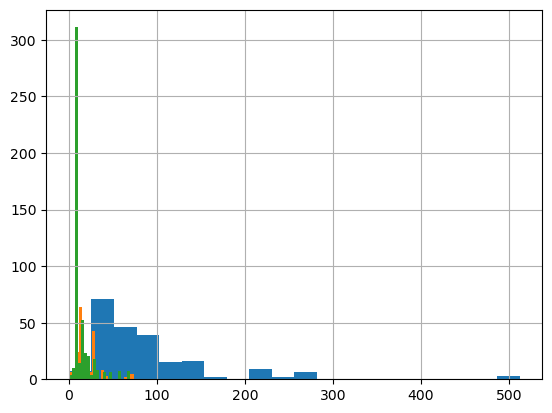

In [50]:

data[data.Pclass == 1]['Fare'].hist(bins=20, alpha=1)
data[data.Pclass == 2]['Fare'].hist(bins=20, alpha=1)
data[data.Pclass == 3]['Fare'].hist(bins=20, alpha=1)

<hr>

### Построим столбчатую диаграмму для признака "класс пассажира":

1) Сгруппируем все данные по признаку Pclass - data.groupby('Pclass') и посчитаем количество в каждой из групп - size()

In [51]:
data.groupby('Pclass').size() 

Pclass
1    216
2    184
3    491
dtype: int64

2) На полученных данных построим диаграмму:

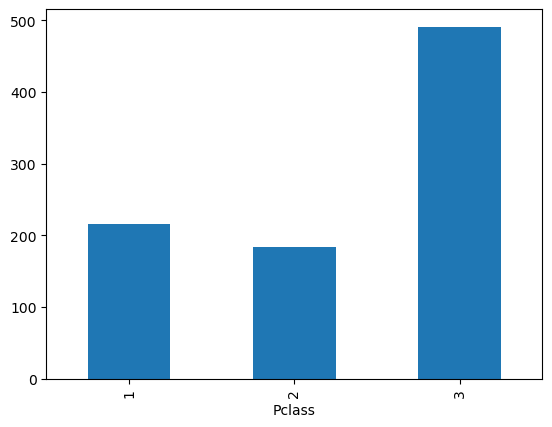

In [55]:
data.groupby('Pclass').size().plot(kind = 'bar');

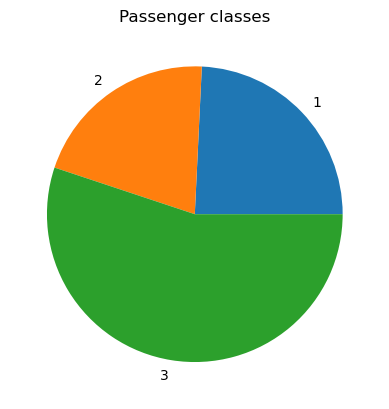

In [56]:
x = data.groupby('Pclass').size().plot(kind = 'pie', title = 'Passenger classes')

In [57]:
data.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

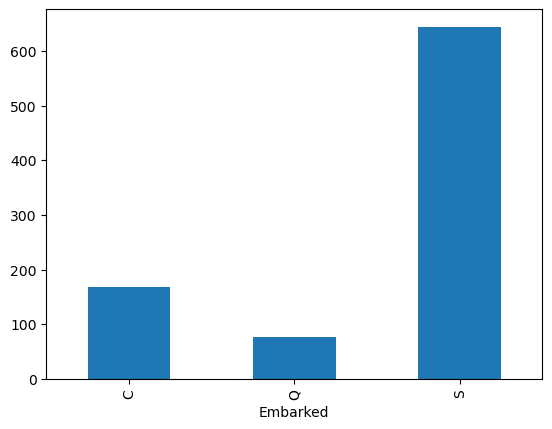

In [58]:
data.groupby('Embarked').size().plot(kind = 'bar');

Можно делать и чуть более сложные графики. Давйте посмотрим на распределение выживших среди мужчин и женщин.

In [59]:
data.groupby('Survived')['Sex'].value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: count, dtype: int64

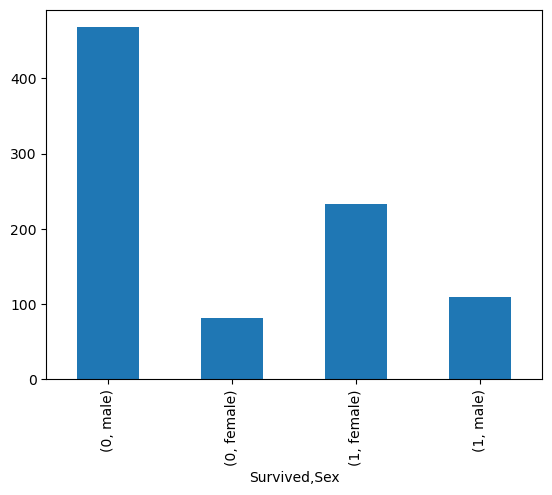

In [60]:
data.groupby('Survived')['Sex'].value_counts().plot(kind = 'bar');

Так мы видим разбивку, но хотелось бы получить составные столбики. Для этого выполним метод unstack(), который преобразует датафрейм.

In [61]:
data.groupby('Survived')['Sex'].value_counts() # без unstack

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: count, dtype: int64

In [62]:
data.groupby('Survived')['Sex'].value_counts().unstack()
# с unstack. Обратите внимание, как изменилась структура датафрема.

Sex,female,male
Survived,,
0,81,468
1,233,109


А вот его мы уже можем визуализировать. 

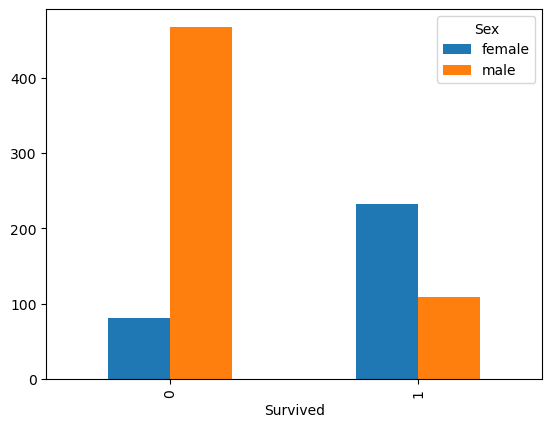

In [63]:
data.groupby('Survived')['Sex'].value_counts().unstack().plot(kind = 'bar');

Уже лучше. А еще можно добавить дополнительный параметр в метод plot() и станет совсем хорошо.

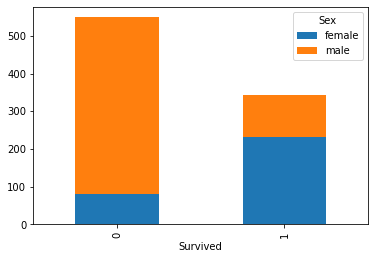

In [28]:
data.groupby('Survived')['Sex'].value_counts().unstack()\
                .plot(kind='bar', stacked = True);